In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import torch
from torch_geometric.datasets import QM9
from torch_geometric.loader import DataLoader
from torch_geometric import transforms
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

from shot import SHOTDescriptor

%matplotlib widget

DATA_PATH = "/scratch/local/ssd/nhat/data/"

RANDOM_TRANSFORM = transforms.Compose(
    [
        transforms.RandomRotate(180, 0),
        transforms.RandomRotate(180, 1),
        transforms.RandomRotate(180, 2),
    ]
)

In [19]:
data = QM9(DATA_PATH)
loader = DataLoader(data, batch_size=1, shuffle=True)
shot = SHOTDescriptor(4)
trans = RANDOM_TRANSFORM

batch_orig = data[10]
batch_trans = RANDOM_TRANSFORM(batch_orig)

In [25]:
desc_orig, lrfs_orig= shot(batch_orig.pos, True)
desc_trans, lrfs_trans = shot(batch_trans.pos, True)

proj_orig = torch.inner(batch_orig.pos, lrfs_orig[1]) 
proj_rot = torch.inner(batch_trans.pos, lrfs_trans[1])

In [26]:
torch.allclose(proj_orig, proj_rot, atol=1e-6)
(proj_orig - proj_rot).max() # 4.2523

tensor(4.2523)

In [32]:
rand_rot = torch.tensor(R.random().as_matrix(), dtype=torch.float)

In [33]:
proj_orig = torch.inner(batch_orig.pos, lrfs_orig)
proj_rot = torch.inner(batch_orig.pos @ rand_rot, lrfs_trans)

In [18]:
proj_orig - proj_rot

tensor([[[ 0.1022, -1.0745, -2.1274],
         [ 0.4806, -0.3083, -1.9594],
         [-1.9647, -0.3516, -2.4584],
         ...,
         [ 1.6349,  0.1127,  0.4536],
         [ 1.0617, -2.0510,  1.8888],
         [ 1.1160,  1.2343, -2.2056]],

        [[-0.2157, -0.1366,  0.1237],
         [-0.0498,  0.0969,  0.1895],
         [ 0.2083, -0.0264, -0.4479],
         ...,
         [ 0.2207, -0.0892, -0.1712],
         [ 0.2162,  0.1769,  0.4315],
         [ 0.1924,  0.1806, -0.3720]],

        [[ 1.5871,  2.0504,  0.9884],
         [-0.1662, -2.5428,  1.2245],
         [ 0.7995,  0.0625,  0.1044],
         ...,
         [-0.8917, -0.2496, -0.6663],
         [-0.7135,  1.2665, -1.2781],
         [ 0.4740, -2.8254, -0.0821]],

        ...,

        [[ 4.9367,  5.9828,  2.3566],
         [-0.2645, -6.2790,  2.4099],
         [ 1.3245,  0.4556,  4.0885],
         ...,
         [-4.1061, -0.0527, -0.6263],
         [-3.4325,  2.6232, -6.4231],
         [-0.5985, -8.0933,  3.0790]],

        [[

In [13]:
torch.allclose(proj_orig, proj_rot, atol=1e-6)

False

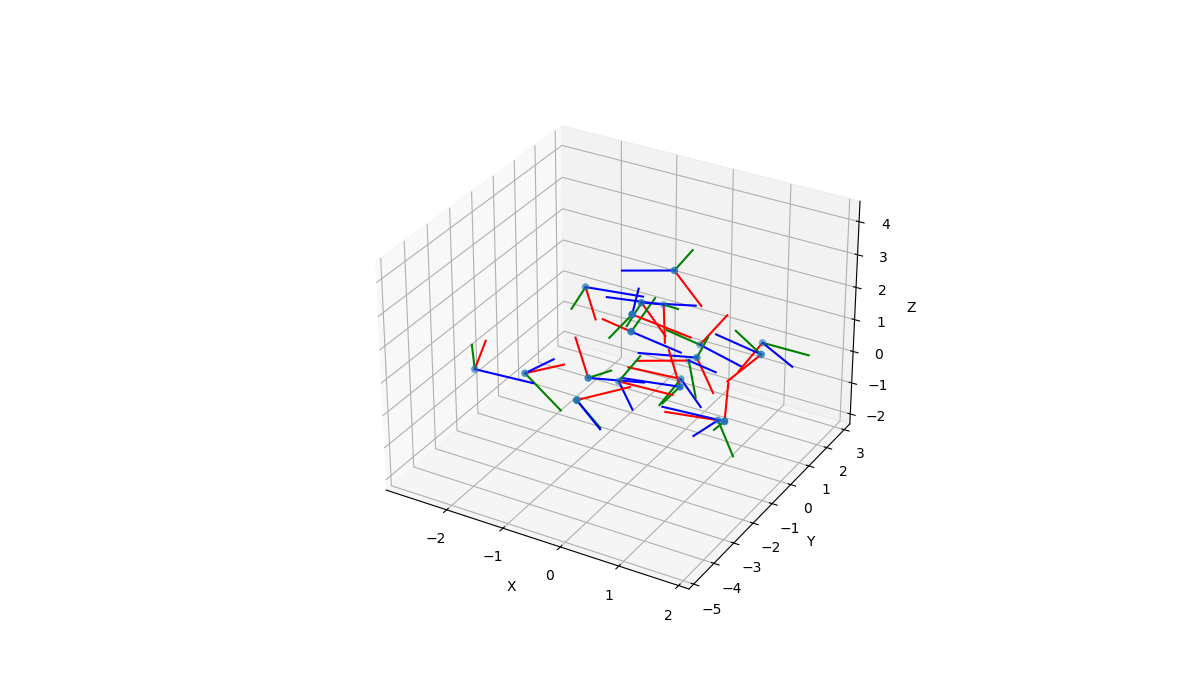

In [16]:
xs, ys, zs = [batch_orig.pos[:, i] for i in range(3)]
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(projection='3d') 
img = ax.scatter(xs, ys, zs)

for i, p in enumerate(batch_orig.pos):
    colors = 'rgb'
    for j, axis in enumerate(lrfs_orig[i]):
        p_end = p + axis
        x_plt, y_plt, z_plt = np.array([p, p_end]).T
        ax.plot(x_plt, y_plt, z_plt, color=colors[j])
    

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [108]:
xs, ys, zs = [batch.pos[:, i] for i in range(3)]
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(projection='3d')
img = ax.scatter(xs, ys, zs)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

<IPython.core.display.Javascript object>